## Importing Libraries

In [3]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import tensorflow as tf
from PIL import Image

from keras.preprocessing import image
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Flatten, Dropout, BatchNormalization, Activation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score


C:\Users\patel\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Splitting in Folders

In [10]:
import os
import shutil
import random

def split_data(input_directory, output_train_directory, output_test_directory, split_ratio=0.8):
    """
    Split data from input_directory into training and test sets.

    Args:
        input_directory (str): Path to the directory containing subdirectories of class data.
        output_train_directory (str): Path to the directory where training data will be stored.
        output_test_directory (str): Path to the directory where test data will be stored.
        split_ratio (float): Split ratio for training data (default is 0.8 for 80% training and 20% testing).
    """
    # Get a list of all subdirectories in the input directory
    subdirectories = [subdir for subdir in os.listdir(input_directory) if os.path.isdir(os.path.join(input_directory, subdir))]
    
    # Create train and test directories if they don't exist
    os.makedirs(output_train_directory, exist_ok=True)
    os.makedirs(output_test_directory, exist_ok=True)

    for subdir in subdirectories:
        subdir_path = os.path.join(input_directory, subdir)
        image_files = [filename for filename in os.listdir(subdir_path) if filename.endswith('.jpg')]

        # Shuffle the list of image files for randomness
        random.shuffle(image_files)

        # Calculate the split point
        split_point = int(len(image_files) * split_ratio)

        # Divide the image files into training and test sets
        train_images = image_files[:split_point]
        test_images = image_files[split_point:]

        # Copy images to the train and test directories
        for image in train_images:
            source_path = os.path.join(subdir_path, image)
            image = 'Fake' +image
            destination_path = os.path.join(output_train_directory, subdir, image)
            os.makedirs(os.path.dirname(destination_path), exist_ok=True)
            shutil.copy(source_path, destination_path)

        for image in test_images:
            source_path = os.path.join(subdir_path, image)
            image = 'Fake' +image
            destination_path = os.path.join(output_test_directory, subdir, image)
            os.makedirs(os.path.dirname(destination_path), exist_ok=True)
            shutil.copy(source_path, destination_path)

# Example usage:
input_directory = "D:/Downloads/AI_ML Course/Final Project/genLogoOutput"  # Directory containing all the image subdirectories
output_train_directory = 'C:/Users/satya/Downloads/AIML/Dataset/FakeLogoCategorize/train_data'  # Directory where training images will be stored
output_test_directory = 'C:/Users/satya/Downloads/AIML/Dataset/FakeLogoCategorize/test_data'  # Directory where test images will be stored

split_data(input_directory, output_train_directory, output_test_directory, split_ratio=0.8)


In [11]:
import os
import shutil
import random

def split_data(input_directory, output_train_directory, output_test_directory, split_ratio=0.8):
    """
    Split data from input_directory into training and test sets.

    Args:
        input_directory (str): Path to the directory containing subdirectories of class data.
        output_train_directory (str): Path to the directory where training data will be stored.
        output_test_directory (str): Path to the directory where test data will be stored.
        split_ratio (float): Split ratio for training data (default is 0.8 for 80% training and 20% testing).
    """
    # Get a list of all subdirectories in the input directory
    subdirectories = [subdir for subdir in os.listdir(input_directory) if os.path.isdir(os.path.join(input_directory, subdir))]
    
    # Create train and test directories if they don't exist
    os.makedirs(output_train_directory, exist_ok=True)
    os.makedirs(output_test_directory, exist_ok=True)

    for subdir in subdirectories:
        subdir_path = os.path.join(input_directory, subdir)
        image_files = [filename for filename in os.listdir(subdir_path) if filename.endswith('.jpg')]

        # Shuffle the list of image files for randomness
        random.shuffle(image_files)

        # Calculate the split point
        split_point = int(len(image_files) * split_ratio)

        # Divide the image files into training and test sets
        train_images = image_files[:split_point]
        test_images = image_files[split_point:]

        # Copy images to the train and test directories
        for image in train_images:
            source_path = os.path.join(subdir_path, image)
            image = 'genuine' +image
            destination_path = os.path.join(output_train_directory, subdir, image)
            
            os.makedirs(os.path.dirname(destination_path), exist_ok=True)
            shutil.copy(source_path, destination_path)

        for image in test_images:
            print(image)
            source_path = os.path.join(subdir_path, image)
            image = 'genuine' +image
            destination_path = os.path.join(output_test_directory, subdir, image)
            os.makedirs(os.path.dirname(destination_path), exist_ok=True)
            shutil.copy(source_path, destination_path)

# Example usage:
input_directory = "C:/Users/satya/Downloads/AIML/Dataset/output"  # Directory containing all the image subdirectories
output_train_directory = 'C:/Users/satya/Downloads/AIML/Dataset/FakeLogoCategorize/train_data'  # Directory where training images will be stored
output_test_directory = 'C:/Users/satya/Downloads/AIML/Dataset/FakeLogoCategorize/test_data'  # Directory where test images will be stored

split_data(input_directory, output_train_directory, output_test_directory, split_ratio=0.8)


000004.jpg
000003.jpg
000004.jpg
000001.jpg
000002.jpg
000001.jpg
000001.jpg
000003.jpg
000004.jpg
000001.jpg
000002.jpg
000005.jpg
000002.jpg
000002.jpg
000003.jpg
000003.jpg
000003.jpg
000003.jpg
000005.jpg
000002.jpg
000003.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg
000001.jpg
000003.jpg
000002.jpg
000003.jpg
000005.jpg
000001.jpg
000002.jpg
000001.jpg
000001.jpg
000001.jpg
000001.jpg
000004.jpg
000004.jpg
000002.jpg
000001.jpg
000005.jpg
000003.jpg
000004.jpg
000005.jpg
000004.jpg
000001.jpg
000001.jpg
000002.jpg
000004.jpg
000005.jpg
000005.jpg
000004.jpg
000001.jpg
000003.jpg
000004.jpg
000004.jpg
000005.jpg
000002.jpg
000002.jpg
000004.jpg
000002.jpg
000004.jpg
000005.jpg


In [4]:
train_dir = r"D:\Project\Web App Flask\Proj\FakeLogoCategorize\train_data"
test_dir = r"D:\Project\Web App Flask\Proj\FakeLogoCategorize\test_data"

## Data Augmentation and Processing

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
#     brightness_range = [0.7,1.3],
)

In [6]:
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=15,
    class_mode='categorical'
)

Found 636 images belonging to 63 classes.


In [7]:
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=15,
    class_mode='categorical'
)

Found 189 images belonging to 63 classes.


## MODEL BUILDING

In [8]:
Image_size=[224,224]

In [9]:
base_model = VGG19(input_shape=Image_size+[3],weights='imagenet',include_top=False)

80134624/80134624 [==============================] - 209s 3us/step


In [10]:
for i in base_model.layers:
    i.trainable = False

In [11]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(63,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 63)                1580607   
                                                                 
Total params: 21604991 (82.42 MB)
Trainable params: 1580607 (6.03 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = ['Accuracy']
)

In [14]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_data,
        validation_data =test_data,
        epochs = 10,
        batch_size = 15,
        shuffle = True
    )

Epoch 1/10
43/43 [==============================] - 242s 6s/step - loss: 4.3897 - Accuracy: 0.3129 - val_loss: 1.4323 - val_Accuracy: 0.6825
Epoch 2/10
43/43 [==============================] - 2057s 49s/step - loss: 0.5806 - Accuracy: 0.8553 - val_loss: 0.7637 - val_Accuracy: 0.7778
Epoch 3/10
43/43 [==============================] - 214s 5s/step - loss: 0.2594 - Accuracy: 0.9355 - val_loss: 0.3940 - val_Accuracy: 0.8889
Epoch 4/10
43/43 [==============================] - 205s 5s/step - loss: 0.1182 - Accuracy: 0.9717 - val_loss: 0.3183 - val_Accuracy: 0.9153
Epoch 5/10
43/43 [==============================] - 197s 5s/step - loss: 0.0746 - Accuracy: 0.9796 - val_loss: 0.3401 - val_Accuracy: 0.9101
Epoch 6/10
43/43 [==============================] - 194s 5s/step - loss: 0.0515 - Accuracy: 0.9890 - val_loss: 0.2000 - val_Accuracy: 0.9206
Epoch 7/10
43/43 [==============================] - 197s 5s/step - loss: 0.0160 - Accuracy: 1.0000 - val_loss: 0.2417 - val_Accuracy: 0.9312
Epoch 8/10


In [15]:
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training and validation Accuracy')

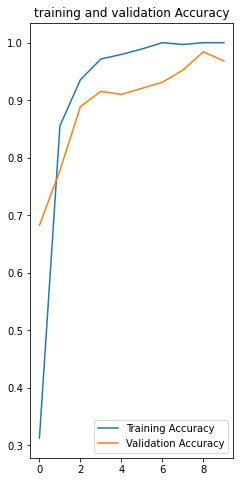

In [16]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label='Training Accuracy')
plt.plot(range(10),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('training and validation Accuracy')

In [17]:
model.predict([test_data[1][0]]).shape

1/1 [==============================] - 2s 2s/step


(15, 63)

In [65]:
model.save("Logo_classification.h5")

C:\Users\patel\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Testing the model

In [7]:
from keras.models import load_model
model = load_model("Logo_classification.h5",compile=False)

In [67]:
from keras.preprocessing import image
img_test = image.load_img(r"D:\Project\Web App Flask\Proj\FakeLogoCategorize\train_data\Cadbury\Fake000002.jpg", target_size=(224,224))

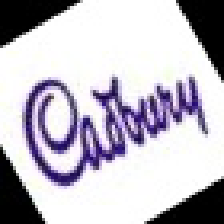

In [68]:
img_test

In [69]:
img_arr = image.img_to_array(img_test)

In [70]:
img_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [71]:
img_arr = np.expand_dims(img_arr, axis=0)

In [72]:
img_arr.ndim

4

In [39]:
img_arr.shape

(1, 224, 224, 3)

In [40]:
predimg = model.predict(img_arr)

1/1 [==============================] - 1s 791ms/step


In [41]:
predimg

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.1111087e-22, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.6753346e-25, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.7619399e-12, 7.8083017e-22, 0.0000000e+00, 3.8725477e-37,
        3.2782198e-32, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [46]:
index = ['Adidas', 'Amazon', 'Android', 'Apple', 'Ariel', 'BMW', 'Bic', 'Burger King', 'Cadbury', 'Chevrolet', 'Chrome', 'Coca Cola', 'Cowbell', 'Dominos', 'Fila', 'Gillette', 'Google', 'Goya oil', 'Guinness', 'Heinz', 'Honda', 'Hp', 'Huawei', 'Instagram', 'KFC', 'Krisspy Kreme', 'Lays', 'Levis', 'Lg', 'Lipton', 'Mars', 'Marvel', 'McDonald', 'Mercedes Benz', 'Microsoft', 'MnM', 'Mtn', 'Mountain dew', 'NASA', 'Nescafe', 'Nestle', 'Nestle milo', 'Netflix', 'Nike', 'Nutella', 'Oral-B', 'Oreo', 'Pay pal', 'Peak milk', 'Pepsi', 'PlayStation', 'Pringles', 'Puma', 'Reebok', 'Rolex', 'Samsung', 'Sprite', 'Starbucks', 'Tesla', 'Tiktok', 'Twitter', 'YouTube', 'Zara']
index

['Adidas',
 'Amazon',
 'Android',
 'Apple',
 'Ariel',
 'BMW',
 'Bic',
 'Burger King',
 'Cadbury',
 'Chevrolet',
 'Chrome',
 'Coca Cola',
 'Cowbell',
 'Dominos',
 'Fila',
 'Gillette',
 'Google',
 'Goya oil',
 'Guinness',
 'Heinz',
 'Honda',
 'Hp',
 'Huawei',
 'Instagram',
 'KFC',
 'Krisspy Kreme',
 'Lays',
 'Levis',
 'Lg',
 'Lipton',
 'Mars',
 'Marvel',
 'McDonald',
 'Mercedes Benz',
 'Microsoft',
 'MnM',
 'Mtn',
 'Mountain dew',
 'NASA',
 'Nescafe',
 'Nestle',
 'Nestle milo',
 'Netflix',
 'Nike',
 'Nutella',
 'Oral-B',
 'Oreo',
 'Pay pal',
 'Peak milk',
 'Pepsi',
 'PlayStation',
 'Pringles',
 'Puma',
 'Reebok',
 'Rolex',
 'Samsung',
 'Sprite',
 'Starbucks',
 'Tesla',
 'Tiktok',
 'Twitter',
 'YouTube',
 'Zara']

In [43]:
pred_class = np.argmax(predimg, axis=1)

In [44]:
pred_class[0]

19

In [48]:
index = ['Adidas', 'Amazon', 'Android', 'Apple', 'Ariel', 'BMW', 'Bic', 'Burger King', 'Cadbury', 'Chevrolet', 'Chrome', 'Coca Cola', 'Cowbell', 'Dominos', 'Fila', 'Gillette', 'Google', 'Goya oil', 'Guinness', 'Heinz', 'Honda', 'Hp', 'Huawei', 'Instagram', 'KFC', 'Krisspy Kreme', 'Lays', 'Levis', 'Lg', 'Lipton', 'Mars', 'Marvel', 'McDonald', 'Mercedes Benz', 'Microsoft', 'MnM', 'Mtn', 'Mountain dew', 'NASA', 'Nescafe', 'Nestle', 'Nestle milo', 'Netflix', 'Nike', 'Nutella', 'Oral-B', 'Oreo', 'Pay pal', 'Peak milk', 'Pepsi', 'PlayStation', 'Pringles', 'Puma', 'Reebok', 'Rolex', 'Samsung', 'Sprite', 'Starbucks', 'Tesla', 'Tiktok', 'Twitter', 'YouTube', 'Zara']
result = str(index[pred_class[0]])

In [49]:
result

'Heinz'

In [50]:
maxval = np.amax(predimg, axis=1)
print(maxval[0]*100 , type(maxval))

100.0 <class 'numpy.ndarray'>


In [54]:
imagesx = np.vstack([img_arr])
classes = model.predict(imagesx)
print(classes)

1/1 [==============================] - 0s 176ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1111087e-22 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 1.6753346e-25 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.7619399e-12
  7.8083017e-22 0.0000000e+00 3.8725477e-37 3.2782198e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0185592e-33 0.0000000e+00]]


In [55]:
classes.argmax()

19

In [56]:
classes.max()

1.0

In [57]:
classes.argsort()

array([[ 0, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 30, 29, 31, 27,  1,  2,
         3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 28, 62, 15, 16, 17, 18,
        26, 20, 14, 21, 23, 24, 25, 47, 61, 48, 22,  8, 45, 44, 19]],
      dtype=int64)

In [58]:
index[45]

'Oral-B'

In [59]:
index[44]

'Nutella'

In [60]:
index[8]

'Cadbury'